# Gunshot Detection in the Albufera Natural Park

This notebook presents some audio samples of the test dataset used in the paper:

N. P. García-de-la-Puente, F. Fuentes-Hurtado, L. Fuster, V. Naranjo, G. Piñero. (2023). "Deep Learning Models for Gunshot Detection in the Albufera Natural Park", submitted to <i>EUSIPCO 2023</i>.


In [1]:
import os
import librosa as lib
import librosa.display as display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import scipy.signal as signal
import pandas as pd

import warnings
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## TRUE POSITIVE (TP)


This is a sample of a True Positive. 

Three shots can be heard from 0 to 0.9s. They can be identified by the first three peaks in the time waveform and their corresponding vertical lines in the mel spectrogram.

The background sound is quacking ducks.

 
TRUE POSITIVE - 32928000_33000000.wav ;-;-; Fs = 24000, Duration = 3.00 s
 


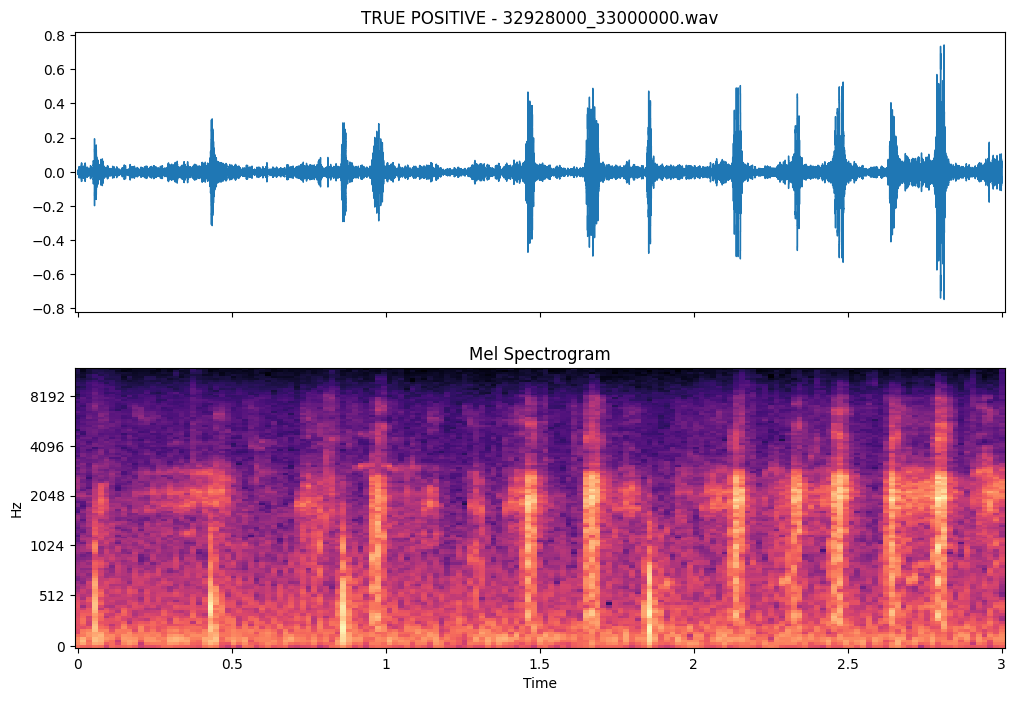

In [3]:
# Read wav
fich = '/content/drive/MyDrive/EUSIPCO/inference/True Positive/32928000_33000000.wav'
y, fs = lib.load(fich, sr=None)
text = 'TRUE POSITIVE - 32928000_33000000.wav'
# print_plot_play(x=y, Fs=fs, text=audio_sample)

duracion = max(y.shape)/fs # duration in s
f'{duracion:.2f}'
print(' ')
print('%s ;-;-; Fs = %d, Duration = %.2f s' % (text, fs, duracion)) 
print(' ')

ipd.display(ipd.Audio(data=y, rate=fs, normalize=True))

# Mel bands
B_mel = 128 
# reference values
ref_p2dB = 20e-6
amin_p2dB = 1e-12

# STFT parameters
L_frame = 900
L_hop = int(L_frame/2)
nfft = 1024

# Mel spectrogram
specM = lib.feature.melspectrogram(y = y, sr = fs, n_fft = nfft, n_mels = B_mel, 
                               hop_length = L_hop, win_length = L_frame)
specM_dB = lib.power_to_db(specM)

# Plot time and Mel spectrogram
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# On the first subplot, show the time signal
img1 = lib.display.waveshow(y, sr=fs, ax=ax[0])
ax[0].set(title=text)

# On the second subplot, show the mel spectrogram
img2 = lib.display.specshow(specM_dB, sr=fs, x_axis='time', y_axis='mel', 
                            hop_length=L_hop, ax=ax[1])
ax[1].set(title='Mel Spectrogram')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
# Individual colorbars:
#fig.colorbar(img2, ax=[ax[1]], format="%+2.f dB")

## TRUE NEGATIVE (TN)

This is a sample of a True Negative. 

The background sound are birds and weak quacking ducks.

 
TRUE NEGATIVE - 57192000_57264000.wav ;-;-; Fs = 24000, Duration = 3.00 s
 


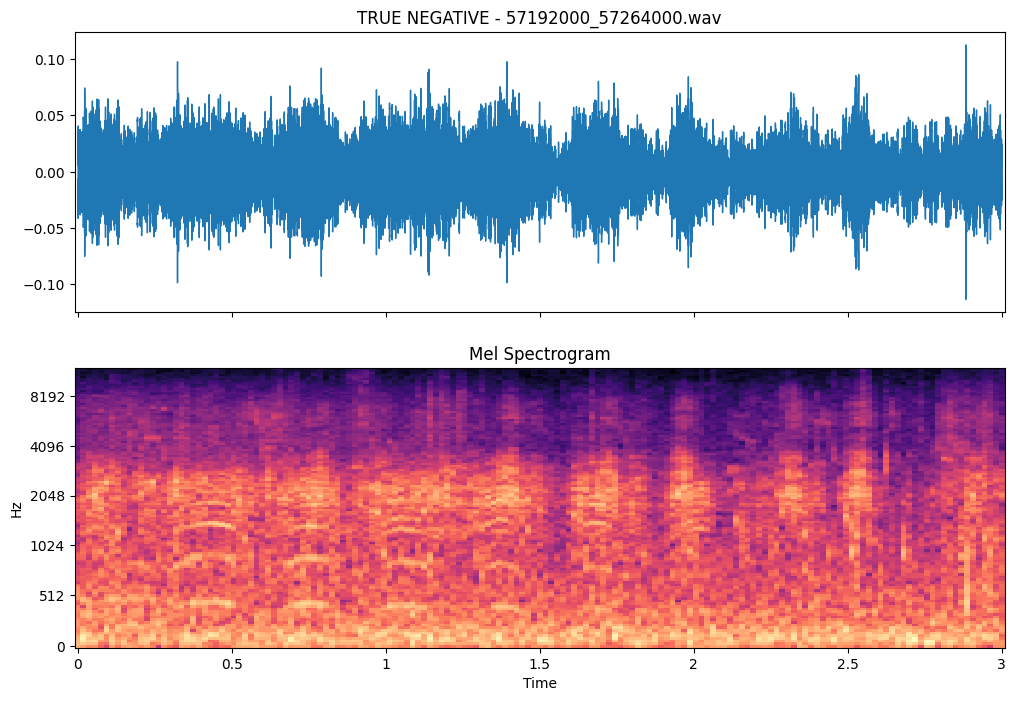

In [4]:
# Read wav
fich = '/content/drive/MyDrive/EUSIPCO/inference/True Negative/57192000_57264000.wav'
y, fs = lib.load(fich, sr=None)
text = 'TRUE NEGATIVE - 57192000_57264000.wav'
# print_plot_play(x=y, Fs=fs, text=audio_sample)

duracion = max(y.shape)/fs # duration in s
f'{duracion:.2f}'
print(' ')
print('%s ;-;-; Fs = %d, Duration = %.2f s' % (text, fs, duracion)) 
print(' ')

ipd.display(ipd.Audio(data=y, rate=fs, normalize=True))

# Mel bands
B_mel = 128 
# reference values
ref_p2dB = 20e-6
amin_p2dB = 1e-12

# STFT parameters
L_frame = 900
L_hop = int(L_frame/2)
nfft = 1024

# Mel spectrogram
specM = lib.feature.melspectrogram(y = y, sr = fs, n_fft = nfft, n_mels = B_mel, 
                               hop_length = L_hop, win_length = L_frame)
specM_dB = lib.power_to_db(specM)

# Plot time and Mel spectrogram
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# On the first subplot, show the time signal
img1 = lib.display.waveshow(y, sr=fs, ax=ax[0])
ax[0].set(title=text)

# On the second subplot, show the mel spectrogram
img2 = lib.display.specshow(specM_dB, sr=fs, x_axis='time', y_axis='mel', 
                            hop_length=L_hop, ax=ax[1])
ax[1].set(title='Mel Spectrogram')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
# Individual colorbars:
#fig.colorbar(img2, ax=[ax[1]], format="%+2.f dB")

## FALSE POSITIVE (FP)

This is a sample of a False Positive.

No shots are heard.

The background sound is quacking ducks.

 
FALSE POSITIVE - 32976000_33048000.wav ;-;-; Fs = 24000, Duration = 3.00 s
 


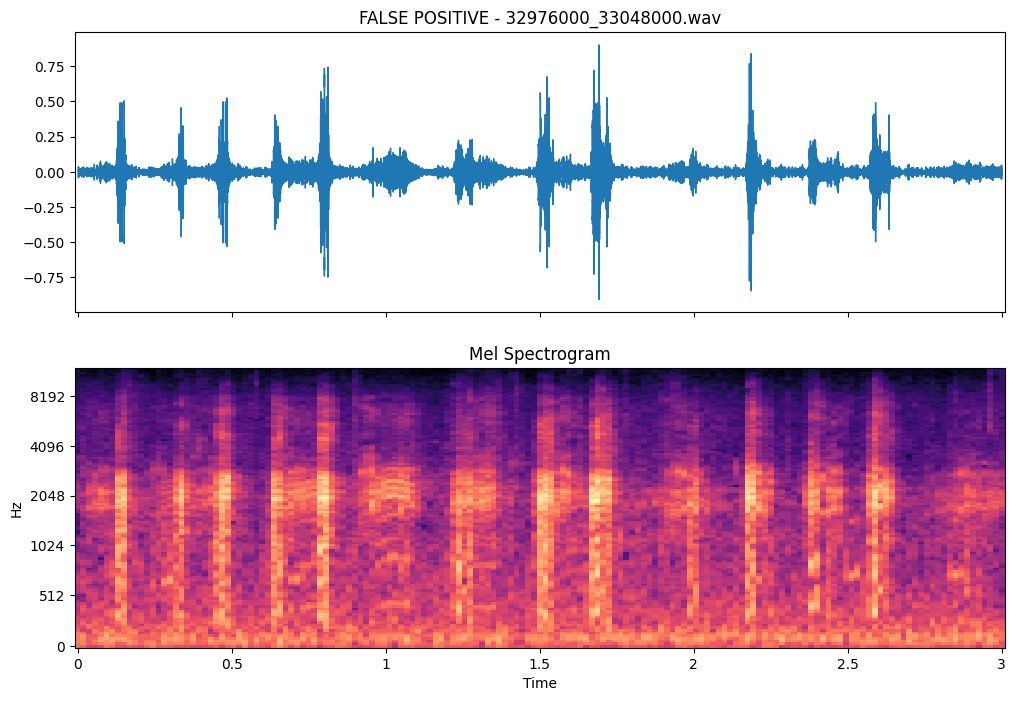

In [5]:
# Read wav
fich = '/content/drive/MyDrive/EUSIPCO/inference/False Positive/32976000_33048000.wav'
y, fs = lib.load(fich, sr=None)
text = 'FALSE POSITIVE - 32976000_33048000.wav'
# print_plot_play(x=y, Fs=fs, text=audio_sample)

duracion = max(y.shape)/fs # duration in s
f'{duracion:.2f}'
print(' ')
print('%s ;-;-; Fs = %d, Duration = %.2f s' % (text, fs, duracion)) 
print(' ')

ipd.display(ipd.Audio(data=y, rate=fs, normalize=True))

# Mel bands
B_mel = 128 
# reference values
ref_p2dB = 20e-6
amin_p2dB = 1e-12

# STFT parameters
L_frame = 900
L_hop = int(L_frame/2)
nfft = 1024

# Mel spectrogram
specM = lib.feature.melspectrogram(y = y, sr = fs, n_fft = nfft, n_mels = B_mel, 
                               hop_length = L_hop, win_length = L_frame)
specM_dB = lib.power_to_db(specM)

# Plot time and Mel spectrogram
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# On the first subplot, show the time signal
img1 = lib.display.waveshow(y, sr=fs, ax=ax[0])
ax[0].set(title=text)

# On the second subplot, show the mel spectrogram
img2 = lib.display.specshow(specM_dB, sr=fs, x_axis='time', y_axis='mel', 
                            hop_length=L_hop, ax=ax[1])
ax[1].set(title='Mel Spectrogram')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
# Individual colorbars:
#fig.colorbar(img2, ax=[ax[1]], format="%+2.f dB")

## FALSE NEGATIVE (FN)

This is a sample of a False Negative.

Five shots can be heard from 0 to 1.5s. They can be identified by the first five peaks in the time signal and their corresponding vertical lines in the mel spectrogram.

The background sound is quacking ducks.

 
FALSE NEGATIVE - 32904000_32976000.wav ;-;-; Fs = 24000, Duration = 3.00 s
 


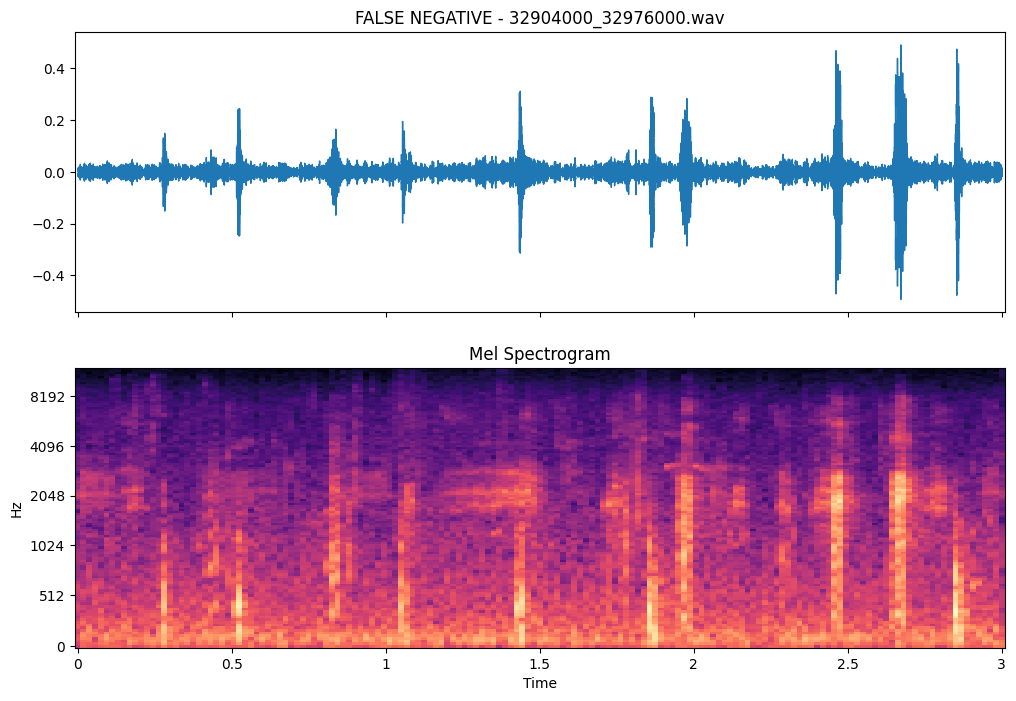

In [6]:
# Read wav
fich = '/content/drive/MyDrive/EUSIPCO/inference/False Negative/32904000_32976000.wav'
y, fs = lib.load(fich, sr=None)
text = 'FALSE NEGATIVE - 32904000_32976000.wav'
# print_plot_play(x=y, Fs=fs, text=audio_sample)

duracion = max(y.shape)/fs # duration in s
f'{duracion:.2f}'
print(' ')
print('%s ;-;-; Fs = %d, Duration = %.2f s' % (text, fs, duracion)) 
print(' ')

ipd.display(ipd.Audio(data=y, rate=fs, normalize=True))

# Mel bands
B_mel = 128 
# reference values
ref_p2dB = 20e-6
amin_p2dB = 1e-12

# STFT parameters
L_frame = 900
L_hop = int(L_frame/2)
nfft = 1024

# Mel spectrogram
specM = lib.feature.melspectrogram(y = y, sr = fs, n_fft = nfft, n_mels = B_mel, 
                               hop_length = L_hop, win_length = L_frame)
specM_dB = lib.power_to_db(specM)

# Plot time and Mel spectrogram
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# On the first subplot, show the time signal
img1 = lib.display.waveshow(y, sr=fs, ax=ax[0])
ax[0].set(title=text)

# On the second subplot, show the mel spectrogram
img2 = lib.display.specshow(specM_dB, sr=fs, x_axis='time', y_axis='mel', 
                            hop_length=L_hop, ax=ax[1])
ax[1].set(title='Mel Spectrogram')

# To eliminate redundant axis labels, we'll use "label_outer" on all subplots:
for ax_i in ax:
    ax_i.label_outer()
# Individual colorbars:
#fig.colorbar(img2, ax=[ax[1]], format="%+2.f dB")